<a href="https://colab.research.google.com/github/Ms-Gichuhi/Hypothesis-testing-for-Autolib-blue-car-usage/blob/master/Hypothesis_testing_Autolib_car_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research question


> we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 






In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("autolib.csv")

In [3]:
description = pd.read_excel("autolib_description.xlsx")
description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [4]:
#previewing dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [6]:
df.shape

(16085, 13)

In [7]:
#dropping columns we will not use as we will be analysisng Blue cars for this particular research question.

df.drop(['Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum'], axis = 1, inplace = True)
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


In [8]:
df.isnull().sum()

Postal code              0
date                     0
n_daily_data_points      0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
Slots_freed_sum          0
Slots_taken_sum          0
dtype: int64

In [9]:
df.duplicated().any()

False

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


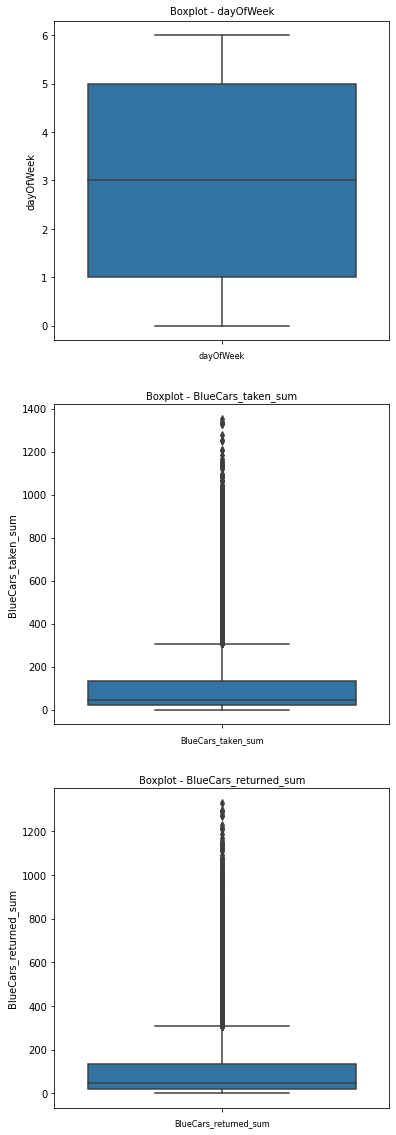

In [10]:
# Checking for Outliers

import matplotlib.pyplot as plt
import seaborn as sns

column_names = ['dayOfWeek', 'BlueCars_taken_sum', 'BlueCars_returned_sum']
fig, ax = plt.subplots(len(column_names), figsize=(6,20))

for i, col_val in enumerate(column_names):
  sns.boxplot(y = df[col_val], ax=ax[i])
  ax[i].set_title('Boxplot - {}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

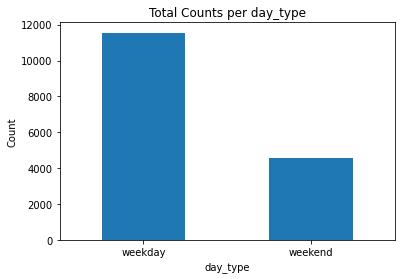

In [11]:
df['day_type'].value_counts().plot.bar(rot =0)
plt.xlabel("day_type")
plt.ylabel("Count")
plt.title("Total Counts per day_type")
plt.show()

#there are more cars coming in and out during weekdays as there are definately more weekdays than weekends

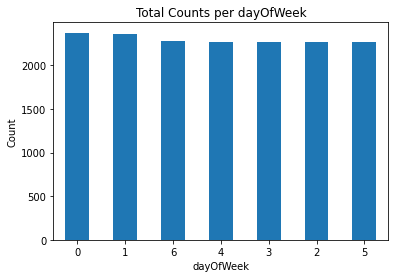

In [12]:
df['dayOfWeek'].value_counts().plot.bar(rot =0)
plt.xlabel("dayOfWeek")
plt.ylabel("Count")
plt.title("Total Counts per dayOfWeek")
plt.show()

#the first days of the week are more busy i.e sunday ,monday and tuesday

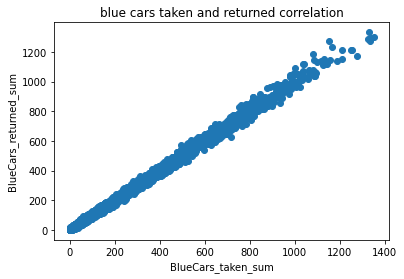

In [14]:
plt.scatter(df["BlueCars_taken_sum"],df["BlueCars_returned_sum"])
plt.title("blue cars taken and returned correlation")
plt.xlabel("BlueCars_taken_sum")
plt.ylabel("BlueCars_returned_sum")
plt.show()

#there is a high correlation between blue cars taken and those returned

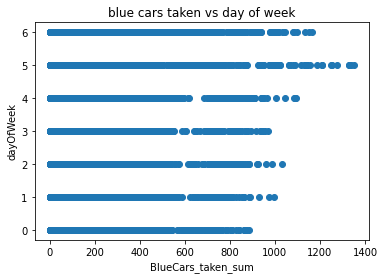

In [15]:
plt.scatter(df["BlueCars_taken_sum"],df["dayOfWeek"])
plt.title("blue cars taken vs day of week")
plt.xlabel("BlueCars_taken_sum")
plt.ylabel("dayOfWeek")
plt.show()

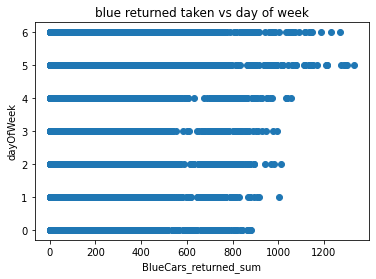

In [17]:
plt.scatter(df["BlueCars_returned_sum"],df["dayOfWeek"])
plt.title("blue returned taken vs day of week")
plt.xlabel("BlueCars_returned_sum")
plt.ylabel("dayOfWeek")
plt.show()

In [18]:
#Unique Postal Codes
df['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

Creating population and sample

In [61]:
strata = df.groupby('Postal code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.5))
strata

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
89,75001,4/3/2018,1440,1,weekday,112,111,22,22
48,75001,2/18/2018,1438,6,weekend,157,158,26,25
140,75001,6/4/2018,1440,0,weekday,99,95,11,11
147,75001,6/11/2018,1440,0,weekday,116,113,17,16
120,75001,5/4/2018,1435,4,weekday,129,130,16,18
...,...,...,...,...,...,...,...,...,...
16060,95880,5/26/2018,1440,5,weekend,19,17,0,0
16065,95880,5/31/2018,1411,3,weekday,12,17,0,0
16025,95880,4/10/2018,1440,1,weekday,6,7,0,0
16055,95880,5/21/2018,1440,0,weekday,26,27,0,0


In [86]:
#extracting two area for postal code 75015 and 75017 from our sample
strata1 = strata[strata['Postal code'].isin(['75015', '75017'])]
strata1

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
2207,75015,1/24/2018,1434,2,weekday,784,798,203,214
2325,75015,6/5/2018,1439,1,weekday,994,1004,241,241
2278,75015,4/8/2018,1440,6,weekend,1082,1189,280,289
2187,75015,1/4/2018,1320,3,weekday,669,644,165,158
2232,75015,2/18/2018,1438,6,weekend,1037,1072,272,263
...,...,...,...,...,...,...,...,...,...
2608,75017,4/26/2018,1440,3,weekday,706,704,188,189
2621,75017,5/20/2018,1440,6,weekend,457,490,136,141
2519,75017,1/24/2018,1434,2,weekday,635,686,163,172
2584,75017,4/2/2018,1439,0,weekday,713,757,179,185


In [81]:
#sample mean
strata1["BlueCars_taken_sum"].mean()

816.6410256410256

In [82]:
#sample standard deviation
strata1["BlueCars_taken_sum"].std()

179.18085830650944

In [77]:
#first dataframe with postal code 75015 on weekends
df_strata1 = strata1[ (strata1['Postal code']== 75015) & (strata1['day_type']=='weekend')]

df_strata1.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
2278,75015,4/8/2018,1440,6,weekend,1082,1189,280,289
2232,75015,2/18/2018,1438,6,weekend,1037,1072,272,263
2285,75015,4/15/2018,1439,6,weekend,1002,1051,277,286
2190,75015,1/7/2018,1440,6,weekend,913,971,215,214
2337,75015,6/17/2018,1440,6,weekend,1001,1090,225,244


In [76]:
#second dataframe with postal code 75017 on weekends
df_strata2 = strata1[ (strata1['Postal code']== 75017) & (strata1['day_type']=='weekend')]

df_strata2.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
2611,75017,4/29/2018,1440,6,weekend,654,662,174,170
2509,75017,1/14/2018,1440,6,weekend,890,963,203,215
2628,75017,5/27/2018,1440,6,weekend,817,894,203,211
2550,75017,2/24/2018,1396,5,weekend,51,57,12,10
2569,75017,3/18/2018,1440,6,weekend,767,806,198,197


In [78]:
df_strata1.shape


(20, 9)

In [74]:
df_strata2.shape

(24, 9)

In [83]:
#hypothesis testing, 
#the claim is that the mean average for the sample of cars taken over the weekend at postalcode 75015(strata1) is equal to that in postal code 75017(strata2)
#H0 : µ 1 = µ 2
#Ha: µ 1 ≠ µ 2
# Significance Level is α = 0.05

#calculating the mean average for blue cars taken

µ1 = df_strata1["BlueCars_taken_sum"].mean()
print("mean for 75015 is", µ1)

µ2 = df_strata2["BlueCars_taken_sum"].mean()
print("mean for 75017 is", µ2)


mean for 75015 is 1109.05
mean for 75017 is 812.1666666666666


In [85]:
# the sample mean is 816.6410256410256
# the sample standard deviation is 179.18085830650944
import scipy.stats as stats
stats.ttest_ind(df_strata1["BlueCars_taken_sum"], df_strata2["BlueCars_taken_sum"], equal_var=True)



Ttest_indResult(statistic=5.922218283021847, pvalue=5.13908298095769e-07)

Our pvalue=5.13908298095769e-07
Our level of significance being 0.05.

This means our p value is way too low than the significance level hence we will reject the null hypothesis.we conclude that the average bluecars taken from the different postalcodes are not equal over the weekends